<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# print decision tree
from sklearn.tree import export_text
# visualize decision tree
from sklearn.tree import plot_tree
#for tree_map visualizatiom
from matplotlib.colors import ListedColormap, to_rgb
#for random sampling
import random

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict,model):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix ' + model); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 
    
    return([cm[0][0], cm[1][0], cm[1][1], cm[0][1]])
    #[TN, FN, TP, FP]
    

In [4]:
def warn(*args, **kwargs):

    pass

import warnings

warnings.warn = warn

## Load the dataframe


Load the data


In [5]:
#from js import fetch
#import io

#URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(text1)

In [6]:
data = pd.read_csv("dataset_part_2.csv")

In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
#URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
#X = pd.read_csv(text2)

In [9]:
X_df = pd.read_csv('dataset_part_3.csv')

In [10]:
X_df.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [12]:
# students get this 
X_df_features=list(X_df.columns)
X_array = X_df.to_numpy()
scaler = preprocessing.StandardScaler()
scaler.fit(X_array)
X = scaler.transform(X_array)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [13]:
X_train, X_test, Y_train, Y_test, I_train, I_test = train_test_split(X, 
                                                                     Y, 
                                                                     data.index, 
                                                                     test_size=0.2, 
                                                                     random_state=2)

we can see we only have 18 test samples.


In [14]:
Y_test.shape

(18,)

In [15]:
shapes = [Y_test.shape[0], Y_train.shape[0]]
class_0 = [len(Y_test)-np.count_nonzero(Y_test), len(Y_train)-np.count_nonzero(Y_train)]
class_1 = [np.count_nonzero(Y_test), np.count_nonzero(Y_train)]

tts_info = pd.DataFrame(list(zip(shapes, class_0, class_1)), columns=['Samples', 'did not land', 'landed'], index=['Test', 'Train'])
tts_info

,Samples,did not land,landed
Test,18,6,12
Train,72,24,48


In [16]:
model_list=['Logistic_Regression', 'SVM', 'Decision_Tree', 'KNN']
models_df=pd.DataFrame(data=model_list, columns=['Model'])
models_df

,Model
0,Logistic_Regression
1,SVM
2,Decision_Tree
3,KNN


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [18]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [19]:
models_df['Tuned_Hyperparameters']=[logreg_cv.best_params_, 
                                    {},
                                    {},
                                    {}]
models_df['Train_Accuracy']=[logreg_cv.best_score_, 
                             0.0, 
                             0.0, 
                             0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429
1,SVM,{},0.000000
2,Decision_Tree,{},0.000000
3,KNN,{},0.000000


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
logreg_tuned = lr.set_params(**logreg_cv.best_params_)
logreg_tuned.fit(X_train, Y_train)
zip(logreg_tuned.coef_, X_train)
models_df['Test_Accuracy']=[logreg_tuned.score(X_test, Y_test), 
                            0.0, 
                            0.0, 
                            0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333
1,SVM,{},0.000000,0.000000
2,Decision_Tree,{},0.000000,0.000000
3,KNN,{},0.000000,0.000000


Lets look at the confusion matrix:


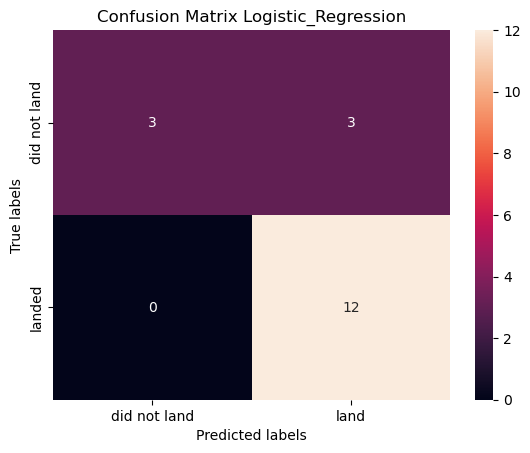

In [21]:
logreg_yhat=logreg_tuned.predict(X_test)
logreg_cm_list=plot_confusion_matrix(Y_test,logreg_yhat,'Logistic_Regression')

In [22]:
models_df['TN_FN_TP_FP']=[logreg_cm_list, 
                          [], 
                          [], 
                          []]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,{},0.000000,0.000000,[]
2,Decision_Tree,{},0.000000,0.000000,[]
3,KNN,{},0.000000,0.000000,[]


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(probability=False)

In [24]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [25]:
models_df['Tuned_Hyperparameters']=[logreg_cv.best_params_, 
                                    svm_cv.best_params_,
                                    {},
                                    {}]
models_df['Train_Accuracy']=[logreg_cv.best_score_, 
                             svm_cv.best_score_, 
                             0.0, 
                             0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.000000,[]
2,Decision_Tree,{},0.000000,0.000000,[]
3,KNN,{},0.000000,0.000000,[]


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [26]:
svm_tuned = svm.set_params(**svm_cv.best_params_)
svm_tuned.fit(X_train, Y_train)
models_df['Test_Accuracy']=[logreg_tuned.score(X_test, Y_test), 
                            svm_tuned.score(X_test, Y_test), 
                            0.0, 
                            0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,[]
2,Decision_Tree,{},0.000000,0.000000,[]
3,KNN,{},0.000000,0.000000,[]


We can plot the confusion matrix


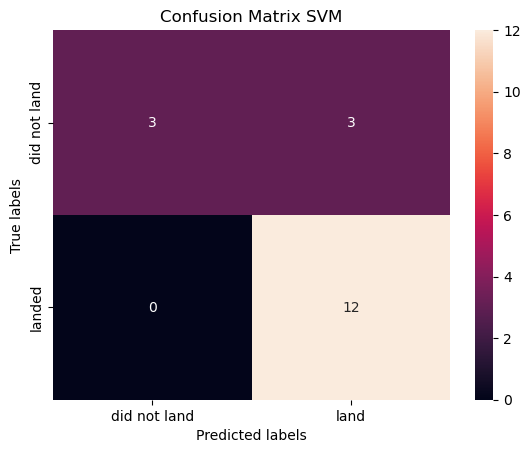

In [27]:
svm_yhat=svm_tuned.predict(X_test)
svm_cm_list=plot_confusion_matrix(Y_test,svm_yhat,'SVM')

In [28]:
models_df['TN_FN_TP_FP']=[logreg_cm_list, 
                          svm_cm_list, 
                          [], 
                          []]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,{},0.000000,0.000000,[]
3,KNN,{},0.000000,0.000000,[]


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [29]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'random_state':[0]}

tree = DecisionTreeClassifier()

In [30]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [0],
                         'splitter': ['best', 'random']})

In [31]:
models_df['Tuned_Hyperparameters']=[logreg_cv.best_params_, 
                                    svm_cv.best_params_, 
                                    tree_cv.best_params_, 
                                    0.0]
models_df['Train_Accuracy']=[logreg_cv.best_score_, 
                             svm_cv.best_score_, 
                             tree_cv.best_score_, 
                             0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.000000,[]
3,KNN,0.0,0.000000,0.000000,[]


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [32]:
tree_tuned = tree.set_params(**tree_cv.best_params_)
tree_tuned.fit(X_train, Y_train)
models_df['Test_Accuracy']=[logreg_tuned.score(X_test, Y_test), 
                            svm_tuned.score(X_test, Y_test),
                            tree_tuned.score(X_test, Y_test), 0.0]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.833333,[]
3,KNN,0.0,0.000000,0.000000,[]


We can plot the confusion matrix


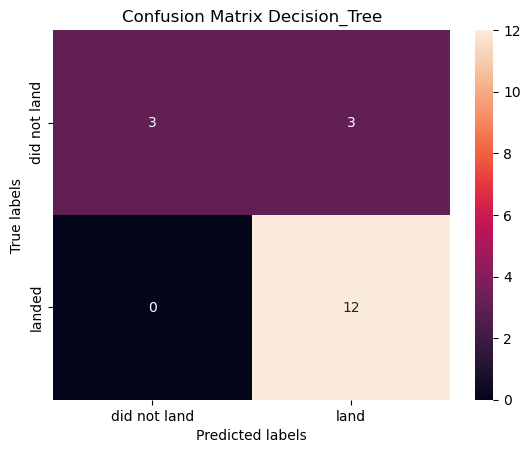

In [33]:
tree_yhat = tree_tuned.predict(X_test)
tree_cm_list=plot_confusion_matrix(Y_test,tree_yhat,'Decision_Tree')

In [34]:
models_df['TN_FN_TP_FP']=[logreg_cm_list, svm_cm_list, tree_cm_list, []]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.833333,"[3, 0, 12, 3]"
3,KNN,0.0,0.000000,0.000000,[]


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [35]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

In [36]:
#use this as a patch for warning about keepdims
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [37]:
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10)

knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [38]:
models_df['Tuned_Hyperparameters']=[logreg_cv.best_params_, 
                                    svm_cv.best_params_, 
                                    tree_cv.best_params_,
                                    knn_cv.best_params_]
models_df['Train_Accuracy']=[logreg_cv.best_score_, 
                             svm_cv.best_score_, 
                             tree_cv.best_score_, 
                             knn_cv.best_score_]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.833333,"[3, 0, 12, 3]"
3,KNN,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}",0.848214,0.000000,[]


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [39]:
knn_tuned = knn.set_params(**knn_cv.best_params_)
knn_tuned.fit(X_train, Y_train)
models_df['Test_Accuracy']=[logreg_tuned.score(X_test, Y_test), 
                            svm_tuned.score(X_test, Y_test), 
                            tree_tuned.score(X_test, Y_test),
                            knn_tuned.score(X_test, Y_test)]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.833333,"[3, 0, 12, 3]"
3,KNN,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}",0.848214,0.833333,[]


We can plot the confusion matrix


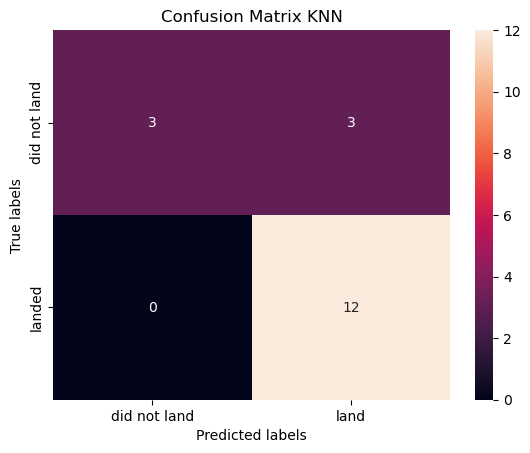

In [40]:
knn_yhat = knn_tuned.predict(X_test)
knn_cm_list=plot_confusion_matrix(Y_test,knn_yhat,'KNN')

In [41]:
models_df['TN_FN_TP_FP']=[logreg_cm_list, 
                          svm_cm_list, 
                          tree_cm_list,
                          knn_cm_list]
models_df

,Model,Tuned_Hyperparameters,Train_Accuracy,Test_Accuracy,TN_FN_TP_FP
0,Logistic_Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846429,0.833333,"[3, 0, 12, 3]"
1,SVM,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.848214,0.833333,"[3, 0, 12, 3]"
2,Decision_Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.862500,0.833333,"[3, 0, 12, 3]"
3,KNN,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}",0.848214,0.833333,"[3, 0, 12, 3]"


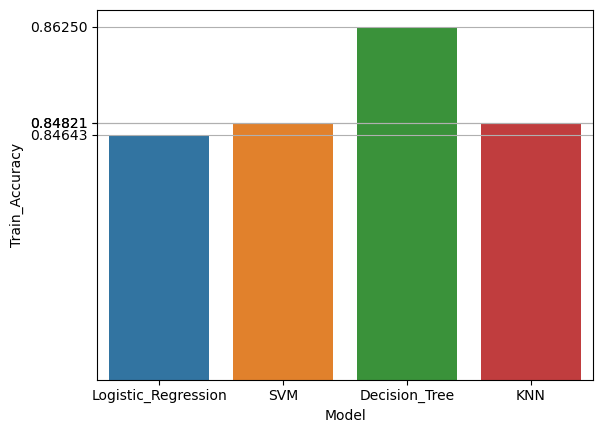

In [42]:
sns.barplot(x=models_df['Model'], y=models_df['Train_Accuracy'])
ax= plt.subplot()
ax.set_ylim(0.81,0.865)
ax.set_yticks(models_df['Train_Accuracy'])
ax.grid(visible=True, axis='y')

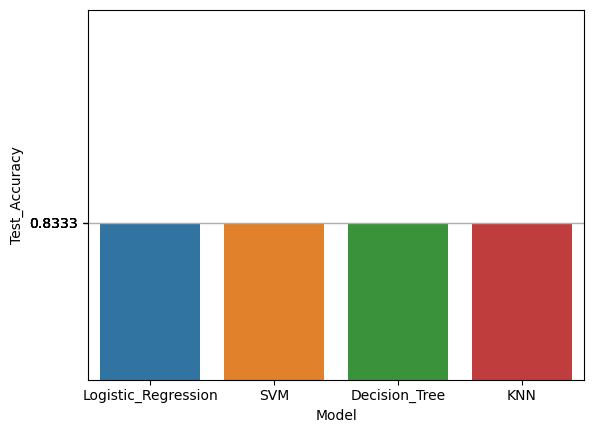

In [43]:
sns.barplot(x=models_df['Model'], y=models_df['Test_Accuracy'])
ax= plt.subplot()
ax.set_ylim(0.81,0.865)
ax.set_yticks(models_df['Test_Accuracy'])
ax.grid(visible=True, axis='y')

## TASK  12


Find the method performs best:


In [88]:
model_list=['Logistic_Regression', 'SVM', 'Decision_Tree', 'KNN']
metrics_df=pd.DataFrame(data=model_list, columns=['Model'])
metrics_df

,Model
0,Logistic_Regression
1,SVM
2,Decision_Tree
3,KNN


## **Logistic Regression Analysis** ##

In [89]:
metrics_df['Assumptions Met']=['Yes','','','']
metrics_df['Signs of Over/Underfit']=['No, but...','','','']
metrics_df['Standardize']=['Yes','','','']
metrics_df['Simple']=['No','','','']
metrics_df


,Model,Assumptions Met,Signs of Over/Underfit,Standardize,Simple
0,Logistic_Regression,Yes,"No, but...",Yes,No
1,SVM,,,,
2,Decision_Tree,,,,
3,KNN,,,,


**Logistic Regression Assumptions - MET**
<ol>
<li> Features are linearly related to the log odds - PROBABLY MET </li>
<li> No multicollinearity of features - NOT NECESSARY (simple predictive model) </li>
<li>'Large' data set - MET</li>
</ol>

**Logistic Regression Disadvantages**
* Overfitting if number of features is large

In [46]:
#dataframe of standardized features
X_standard_df=pd.DataFrame(X,columns=X_df.columns)

In [47]:
binning=np.linspace(X_standard_df['FlightNumber'].min(),X_standard_df['FlightNumber'].max(), 15)
binning
out = pd.cut(X_standard_df['FlightNumber'], 
             bins=binning, #include_lowest=True,
             labels=binning[0:-1])
out_list=list(out)
out_list_df=pd.DataFrame(out_list,columns=['Bin'])
Y_df=pd.DataFrame(Y,columns=['Class'])
    
FlightNumber_df=pd.concat([X_standard_df['FlightNumber'],
                           Y_df,
                           out_list_df],axis=1)

FlightNumber_mean_df=FlightNumber_df.groupby('Bin').mean()
FlightNumber_mean_clean_df=FlightNumber_mean_df[FlightNumber_mean_df['Class']!=1.0]
FlightNumber_mean_clean_df['Log Odds']=np.log(FlightNumber_mean_clean_df['Class']/(1-FlightNumber_mean_clean_df['Class']))
#FlightNumber_mean_clean_df
                            
#sns.regplot(x=FlightNumber_mean_clean_df.index,y=FlightNumber_mean_clean_df['Log Odds'])

In [48]:
binning=np.linspace(X_standard_df['PayloadMass'].min(),X_standard_df['PayloadMass'].max(), 20)
binning
out = pd.cut(X_standard_df['PayloadMass'], 
             bins=binning, #include_lowest=True,
             labels=binning[0:-1])
out_list=list(out)
out_list_df=pd.DataFrame(out_list,columns=['Bin'])
Y_df=pd.DataFrame(Y,columns=['Class'])
    
PayloadMass_df=pd.concat([X_standard_df['PayloadMass'],
                           Y_df,
                           out_list_df],axis=1)

PayloadMass_mean_df=PayloadMass_df.groupby('Bin').mean()
PayloadMass_mean_clean_df=PayloadMass_mean_df[PayloadMass_mean_df['Class']!=1.0]
PayloadMass_mean_clean_df['Log Odds']=np.log(PayloadMass_mean_clean_df['Class']/(1-PayloadMass_mean_clean_df['Class']))
#PayloadMass_mean_clean_df
                            
#sns.regplot(x=PayloadMass_mean_clean_df.index,y=PayloadMass_mean_clean_df['Log Odds'])

**Plots of standardized features and log-odds**

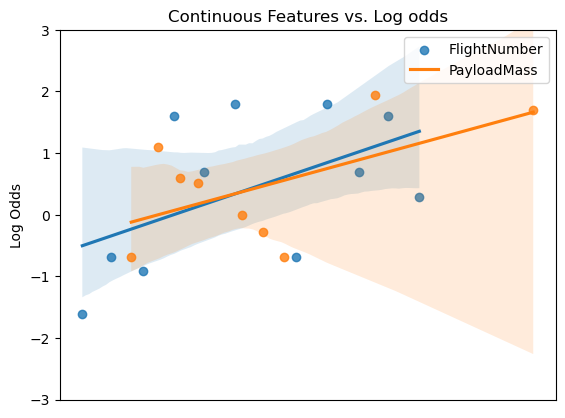

In [49]:
ax=plt.subplot()
        
sns.regplot(data=FlightNumber_mean_clean_df,
            x='FlightNumber',
            y='Log Odds',
            label='FlightNumber')
sns.regplot(data=PayloadMass_mean_clean_df,
            x='PayloadMass',
            y='Log Odds',
            color='tab:orange',
            label='PayloadMass')
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('Continuous Features vs. Log odds')
plt.legend(labels=['FlightNumber','PayloadMass'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('tab:blue')
leg.legendHandles[1].set_color('tab:orange')

The continuous features are not looking very linear

In [50]:
Y_df=pd.DataFrame(Y,columns=['Class'])

Flights_df=pd.concat([X_standard_df['Flights'],
                      Y_df],axis=1)

Flights_mean_df=Flights_df.groupby('Flights').mean()
Flights_mean_clean_df=Flights_mean_df[Flights_mean_df['Class']!=1.0]
Flights_mean_clean_df['Log Odds']=np.log(Flights_mean_df['Class']/(1-Flights_mean_clean_df['Class']))

#sns.regplot(data=Flights_mean_clean_df,
#            x=Flights_mean_clean_df.index,
#            y='Log Odds',
#            label='Flights')

In [51]:
Y_df=pd.DataFrame(Y,columns=['Class'])

Block_df=pd.concat([X_standard_df['Block'],
                    Y_df],axis=1)

Block_mean_df=Block_df.groupby('Block').mean()
Block_mean_clean_df=Block_mean_df[Block_mean_df['Class']!=1.0]
Block_mean_clean_df['Log Odds']=np.log(Block_mean_df['Class']/(1-Block_mean_clean_df['Class']))

#sns.regplot(data=Block_mean_clean_df,
#            x=Block_mean_clean_df.index,
#            y='Log Odds',
#            label='Block')

In [52]:
Y_df=pd.DataFrame(Y,columns=['Class'])

ReusedCount_df=pd.concat([X_standard_df['ReusedCount'],
                          Y_df],axis=1)

ReusedCount_mean_df=ReusedCount_df.groupby('ReusedCount').mean()
ReusedCount_mean_clean_df=ReusedCount_mean_df[ReusedCount_mean_df['Class']!=1.0]
ReusedCount_mean_clean_df['Log Odds']=np.log(ReusedCount_mean_df['Class']/(1-ReusedCount_mean_clean_df['Class']))

#sns.regplot(data=ReusedCount_mean_clean_df,
#            x=ReusedCount_mean_clean_df.index,
#            y='Log Odds',
#            label='ReusedCount')

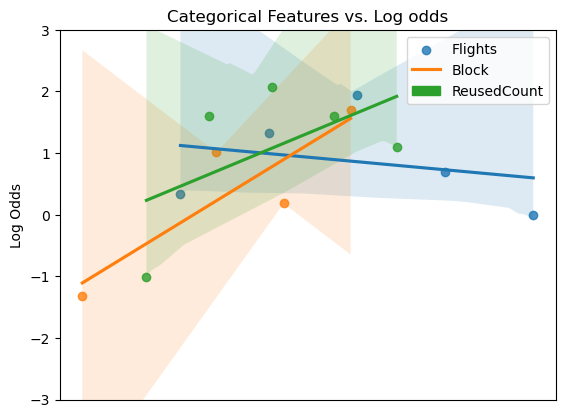

In [53]:
ax=plt.subplot()
        
sns.regplot(data=Flights_mean_clean_df,
            x=Flights_mean_clean_df.index,
            y='Log Odds',
            label='Flights')
sns.regplot(data=Block_mean_clean_df,
            x=Block_mean_clean_df.index,
            y='Log Odds',
            color='tab:orange',
            label='Block')
sns.regplot(data=ReusedCount_mean_clean_df,
            x=ReusedCount_mean_clean_df.index,
            y='Log Odds',
            color='tab:green',
            label='ReusedCount')
ax.set_ylim(-3,3)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('Categorical Features vs. Log odds')
plt.legend(labels=['Flights','Block','ReusedCount'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('tab:blue')
leg.legendHandles[1].set_color('tab:orange')
leg.legendHandles[2].set_color('tab:green')

The categorical features are also not looking very linear

<AxesSubplot:xlabel='GridFins_False', ylabel='Log Odds'>

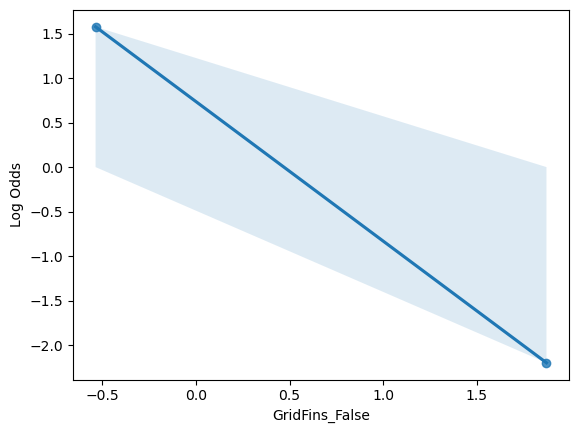

In [54]:
Y_df=pd.DataFrame(Y,columns=['Class'])

GridFins_False_df=pd.concat([X_standard_df['GridFins_False'],
                          Y_df],axis=1)

GridFins_False_mean_df=GridFins_False_df.groupby('GridFins_False').mean()
GridFins_False_mean_clean_df=GridFins_False_mean_df[GridFins_False_mean_df['Class']!=1.0]
GridFins_False_mean_clean_df['Log Odds']=np.log(GridFins_False_mean_df['Class']/(1-GridFins_False_mean_clean_df['Class']))

sns.regplot(data=GridFins_False_mean_clean_df,
            x=GridFins_False_mean_clean_df.index,
            y='Log Odds',
            label='GridFins_False')

The one-hot features are linear due to their encoding

**2. No multicollinearity in independent variables - NOT NECESSARY for simple predictive model**

<AxesSubplot:>

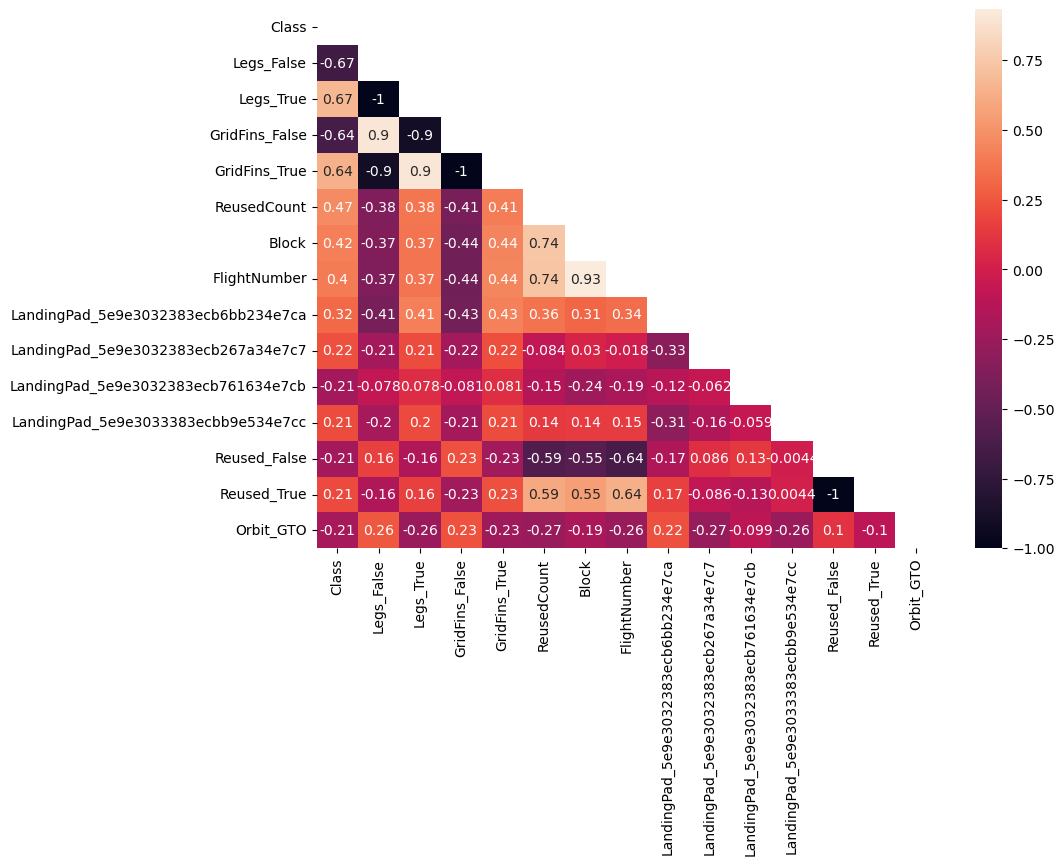

In [55]:
combo=pd.concat([data['Class'],X_df],axis=1)

combo_corr=combo.corr()
combo_corr_feature_rank=(combo_corr['Class'].abs()).sort_values(ascending=False)
combo_corr_rank=combo_corr[combo_corr_feature_rank.index]

combo_corr_filter=combo_corr_rank[combo_corr_rank['Class'].abs()>0.2]
combo_corr_filter_feature_rank=(combo_corr_filter['Class'].abs()).sort_values(ascending=False)
combo_filter_rank_order=combo[combo_corr_filter_feature_rank.index]
combo_filter_rank_order_corr=combo_filter_rank_order.corr()

# set figure size
plt.figure(figsize=(10,7))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(combo_filter_rank_order_corr, dtype=bool))
sns.heatmap(combo_filter_rank_order_corr,annot=True,mask=mask)

* The boolean one-hot variables are 100% correlated
* GridFins and Legs are 90% correlated
* FlightNumber and Block are 93%

**3. 'Large' data set - MET**

**Visualization of Logistic Regression model for the Test data**
* Decision function - distance of the point to the decision boundary in the 83 dimensional space

Text(0.5, 1.0, 'Logistic Regression')

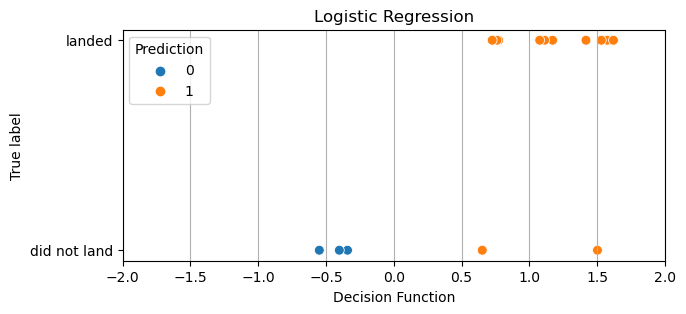

In [56]:
logreg_confidence_df=pd.DataFrame(list(zip(logreg_tuned.decision_function(X_test),
                                           logreg_tuned.predict(X_test),
                                           Y_test)),
                                       columns=['Decision Function',
                                                'Prediction',
                                                'True label number'])
logreg_confidence_df['True label'] = logreg_confidence_df['True label number'].replace({1:'landed',
                                                                                 0:'did not land'})
#print(tts_info.loc['Test'])

plt.figure(figsize=(7,3))
ax=sns.scatterplot(data=logreg_confidence_df,
                   x='Decision Function', 
                   hue='Prediction', 
                   y='True label',
                   s=50)
ax.set_xlim(-2,2)
ax.grid(visible=True,axis='x')
ax.set_title('Logistic Regression')

In [57]:
logreg_confidence_df

,Decision Function,Prediction,True label number,True label
0,0.773367,1,1,landed
1,1.602496,1,1,landed
2,1.171030,1,1,landed
3,1.573328,1,1,landed
4,1.078395,1,1,landed
5,1.530078,1,1,landed
6,1.417179,1,1,landed
7,-0.548946,0,0,did not land
8,1.501880,1,0,did not land
9,-0.341096,0,0,did not land


## **SVM Analysis**

In [90]:
metrics_df['Assumptions Met']=['Yes','Yes','','']
metrics_df['Signs of Over/Underfit']=['No, but...','No','','']
metrics_df['Standardize']=['Yes','Yes','','']
metrics_df['Simple']=['No','No','','']
metrics_df

,Model,Assumptions Met,Signs of Over/Underfit,Standardize,Simple
0,Logistic_Regression,Yes,"No, but...",Yes,No
1,SVM,Yes,No,Yes,No
2,Decision_Tree,,,,
3,KNN,,,,


**SVM Assumptions - 100% SATISFIED (the model has an accuracy score that is considered 'good')**
* There exists a line that will separate the classes in the multidimensional space (in this case, 83 dimensions)

**SVM Disadvantages**
* Standardization is neccessary for best performance
* Not easily explainable
* Feature selection is somewhat necessary for better performance and generalization to new data

**SVM Advantages**
* Maximizes the predictive accuracy of a model without overfitting the training data

**Visualization of SVM for the test data**
* Decision function - distance of the point to the hyperplane in the 83 dimensional space

Text(0.5, 1.0, 'SVM')

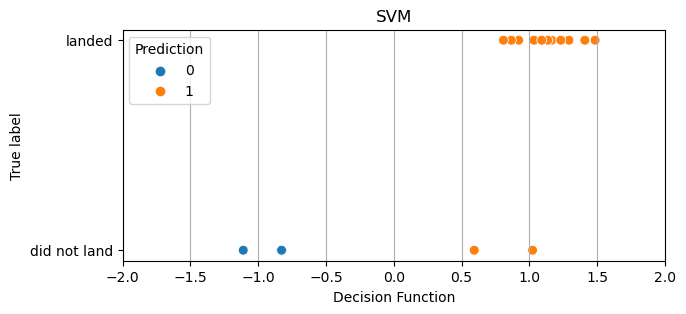

In [59]:
svm_confidence_df=pd.DataFrame(list(zip(svm_tuned.decision_function(X_test),
                                           svm_tuned.predict(X_test),
                                           Y_test)),
                                       columns=['Decision Function',
                                                'Prediction',
                                                'True label number'])
svm_confidence_df['True label'] = svm_confidence_df['True label number'].replace({1:'landed',
                                                                                 0:'did not land'})
#print(tts_info.loc['Test'])

plt.figure(figsize=(7,3))
ax=sns.scatterplot(data=svm_confidence_df,
                   x='Decision Function', 
                   hue='Prediction', 
                   y='True label',
                   s=50)
ax.set_xlim(-2,2)
ax.grid(visible=True,axis='x')
ax.set_title('SVM')

In [60]:
svm_confidence_df

,Decision Function,Prediction,True label number,True label
0,0.921168,1,1,landed
1,1.238431,1,1,landed
2,1.164791,1,1,landed
3,1.033687,1,1,landed
4,1.484298,1,1,landed
5,1.291707,1,1,landed
6,1.230960,1,1,landed
7,-1.109767,0,0,did not land
8,1.023104,1,0,did not land
9,-0.824236,0,0,did not land


## **Decision Tree Analysis**

In [94]:
metrics_df['Assumptions Met']=['Yes','Yes','Yes','']
metrics_df['Signs of Over/Underfit']=['No, but...','No','No','']
metrics_df['Standardize']=['Yes','Yes','No','']
metrics_df['Simple']=['No','No','Yes','']
metrics_df

,Model,Assumptions Met,Signs of Over/Underfit,Standardize,Simple
0,Logistic_Regression,Yes,"No, but...",Yes,No
1,SVM,Yes,No,Yes,No
2,Decision_Tree,Yes,No,No,Yes
3,KNN,,,,


**Decision Tree Assumptions - 100% SATISFIED**
* Input features have finite, discrete domains

**Decision Tree Disadvantages**
* Overfitting to the training data
* Does not generalize well to new data

**Decision Tree Advantages**
* Simple to implement and explain
* Not necessary to standardize features
* Not sensitive to multicollinearity

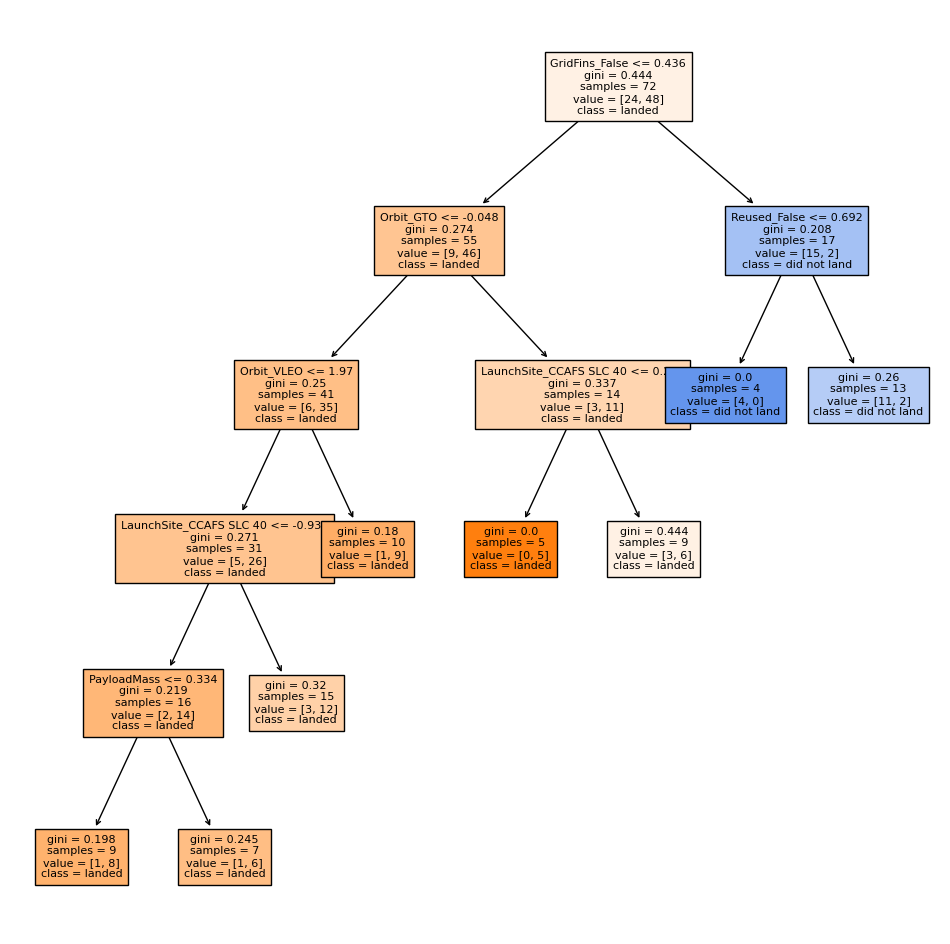

In [62]:
plt.figure(figsize=(12,12))
artists=plot_tree(tree_tuned,feature_names=list(X_df.columns),class_names=['did not land',
                                                                   'landed'],
          filled=True,fontsize=8)

colors=['cornflowerblue','tab:orange']

for artist, impurity, value in zip(artists, tree_tuned.tree_.impurity, tree_tuned.tree_.value):
    # let the max value decide the color; whiten the color depending on impurity (gini)
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2 # for N colors: f = impurity * N/(N-1) if N>1 else 0
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')

In [63]:
X_test_df=pd.DataFrame(X_test, columns=X_df.columns)
Y_test_df=pd.DataFrame(Y_test, columns=['Class'])
combo_test=pd.concat([X_test_df,Y_test_df],axis=1)

In [64]:
tree_split_1_test=combo_test[['GridFins_False','Class']]
(tree_split_1_test.value_counts()).sort_index(0)
#GridFins_False <= 0.44 -> All 'landed', or 1, 3 are 'did not land' or 0

GridFins_False  Class
-0.534522       0         3
                1        12
 1.870829       0         3
dtype: int64

In [65]:
15/18

0.8333333333333334

In [66]:
tree_split_1_data=data[['GridFins','Class']]
(tree_split_1_data.value_counts()).sort_index(0)

GridFins  Class
False     0        18
          1         2
True      0        12
          1        58
dtype: int64

In [67]:
(58+18)/len(data)

0.8444444444444444

In [69]:
data[data['GridFins']==0][data['Class']==1]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


In [70]:
data[data['GridFins']==1][data['Class']==0]
#1012, 1015, 1018, 1017 - testing of landing for v1.1
#1020 - low fuel - expected failure
#1028 - explosion on the ground
#1044 - SpaceX left the landing legs and titanium grid fins in place to prevent further delays - ocean landing due to weather
#1041, 1039 - controlled descent to test recovery options
#1050 - rocket failure
#1056 - incorrect wind data
#1048 - rocket failure

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
11,12,2015-01-10,Falcon 9,2395.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,0
13,14,2015-04-14,Falcon 9,1898.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,0
15,16,2015-06-28,Falcon 9,2477.0,ISS,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,0
17,18,2016-01-17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093,0
18,19,2016-03-04,Falcon 9,5271.0,GTO,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1020,-80.577366,28.561857,0
24,25,2016-09-01,Falcon 9,5500.0,GTO,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,3.0,0,B1028,-80.577366,28.561857,0
45,46,2018-03-06,Falcon 9,6092.0,GTO,CCAFS SLC 40,None None,1,True,False,True,NaN,4.0,0,B1044,-80.577366,28.561857,0
46,47,2018-03-30,Falcon 9,9600.0,PO,VAFB SLC 4E,None None,2,True,True,True,NaN,4.0,1,B1041,-120.610829,34.632093,0
47,48,2018-04-02,Falcon 9,2760.0,ISS,CCAFS SLC 40,None None,2,True,True,True,NaN,4.0,1,B1039,-80.577366,28.561857,0
59,60,2018-12-05,Falcon 9,2573.0,ISS,CCAFS SLC 40,False RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,5.0,0,B1050,-80.577366,28.561857,0


After the initial split at GridFins_False, no other branching resulted in different class.  This particular Decision Tree is the most simple model - it can be reduced to just one node.

## **KNN Analysis**

In [95]:
metrics_df['Assumptions Met']=['Yes','Yes','Yes','Yes']
metrics_df['Signs of Over/Underfit']=['No, but...','No','No','No, but...']
metrics_df['Standardize']=['Yes','Yes','No','Yes']
metrics_df['Simple']=['No','No','Yes','Yes']
metrics_df

,Model,Assumptions Met,Signs of Over/Underfit,Standardize,Simple
0,Logistic_Regression,Yes,"No, but...",Yes,No
1,SVM,Yes,No,Yes,No
2,Decision_Tree,Yes,No,No,Yes
3,KNN,Yes,"No, but...",Yes,Yes


**KNN Assumptions**
* Points close to each other in the hyperplane have similar outcomes

**KNN Disadvantages**
* The full dataset is accessed for each new prediction - memory intensive
* Standardization is neccessary for best performance
* High dimensional data make similar points have large distance

**KNN Advantages**
* Easy to explain

In [76]:
knn_distance_df=pd.DataFrame(list(zip(knn_tuned.kneighbors(X=X_test)[0],
                                 knn_tuned.kneighbors(X=X_test)[1],
                                 knn_tuned.predict(X_test),
                                 Y_test)),
                        columns=[['Distance','Index','Prediction','True label number']])
                        

In [77]:
knn_yhat_train=knn_tuned.predict(X_train)
                                        
train_predicted=[]

for n in range(len(knn_distance_df)):
    
    train_predicted.append([x for i, 
                            x in enumerate(knn_yhat_train) if i in 
                            list(knn_distance_df['Index'].iloc[n][0])])


In [78]:
avg_distance=[]

for n in range(len(knn_distance_df)):
    
    avg_distance.append((knn_distance_df['Distance'].iloc[n][0]).mean())


In [79]:
knn_distance_df['Prediction Train']=train_predicted
knn_distance_df['Average Distance']=avg_distance


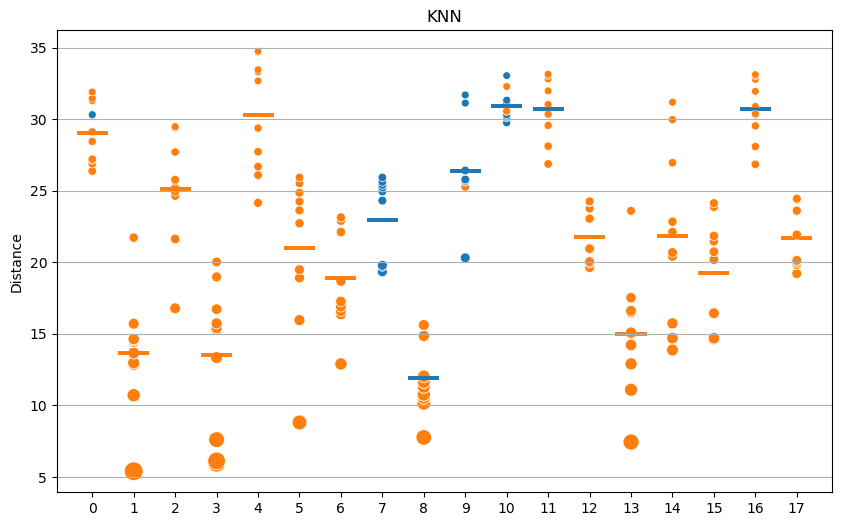

In [80]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.set_title('KNN')
ax.set_ylabel('Distance')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.grid(visible=True,axis='y')

palette = {
    0: 'tab:blue',
    1: 'tab:orange'
}

for n in range(len(Y_test)):
    
    sns.scatterplot(y=knn_distance_df['Distance'].iloc[n,0],
                    x=n,
                    hue=knn_distance_df['Prediction Train'].iloc[n,0],
                    palette=palette,
                    s=(1/knn_distance_df['Distance'].iloc[n,0])*1000)
    sns.scatterplot(y=knn_distance_df['Average Distance'].iloc[:,0],
                    x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                    hue=knn_distance_df['True label number'].iloc[:,0],
                    palette=palette,
                    s=500,
                    marker='_')

ax.get_legend().remove()

In [81]:
FP_list=[]

for i in range(len(Y_test)):
    if (knn_distance_df['Prediction'].iloc[i,0] == 1) and \
       (knn_distance_df['True label number'].iloc[i,0] == 0):
        FP_list.append(knn_distance_df.iloc[i,:])

FP_df=pd.DataFrame(FP_list)

In [82]:
FP_medians_list=list(FP_df['Average Distance'].iloc[:,0])
FP_i=[I_test[x] for x in FP_df.index]

false_positives=[data.iloc[x] for x in FP_i]
false_positives
false_positives_df=pd.DataFrame(false_positives).reset_index()
FP_i_df=pd.DataFrame(list(FP_df.index),columns=['test index'])
FP_medians_i_df=pd.DataFrame(FP_medians_list,columns=['average distance'])

false_positives_test_i_df=pd.concat([false_positives_df,FP_i_df,FP_medians_i_df],axis=1)
false_positives_test_i_df.set_index('index', inplace=True)
false_positives_test_i_df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,test index,average distance
index,,,,,,,,,,,,,,,,,,,,
74,75,2020-02-17,Falcon 9,15400.0,VLEO,CCAFS SLC 40,False ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1056,-80.577366,28.561857,0,8,11.952093
13,14,2015-04-14,Falcon 9,1898.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,0,11,30.723759
11,12,2015-01-10,Falcon 9,2395.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,0,16,30.689043


## **Final Assessment**

**The conclusion is:**

**The Decision Tree model is the best model.**
* It can be trimmed down to one node - GridFins 
* As long as there are no major design changes to the SpaceX booster, GridFins is an accurate predictor of booster landing.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
